In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [16]:
# pip install pydot

In [17]:
# conda install graphviz

In [18]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend
from keras.utils.vis_utils import plot_model

In [19]:
model = Sequential()
model.add(Dense(2,input_shape=(2,), activation = 'sigmoid'))
model.add(Dense(1))

In [20]:
w1 = np.zeros((2, 2)) # two input neurons for two neurons at the hidden layer
b1 = np.zeros((2,))   # one bias neuron for two neurons in the hidden layer
w2 = np.zeros((2, 1)) # two input neurons for one output neuron
b2 = np.zeros((1,))   # one bias for one output neuron

In [21]:
w1[:, 0] =  1 # the weights for the first hidden neuron are all 1
b1[0]    =  0 # bias for the first neuron
w1[:, 1] =  2 # the weights for the second hidden neuron are all 2
b1[1]    = -1 # bias for the second neuron
w2[0, 0] =  1 # weight for the first input of the output neuron
w2[1, 0] = -2 # weight for the second input of the output neuron
b2[0]    =  0 # bias for the output neuron

In [8]:
b1[0] = 0.35
b1[1] = 0.35

In [9]:
w1

array([[1., 2.],
       [1., 2.]])

In [10]:
w1[0,0] = 0.15
w1[0,1] = 0.25

w1[1,0] = 0.20
w1[1,1] = 0.30

w1

array([[0.15, 0.25],
       [0.2 , 0.3 ]])

In [11]:
model.set_weights([w1, b1, w2, b2])

In [12]:
x = np.array([
    [0.05,0.10]
# [0, 0],
# [0, 1],
# [1, 0],
# [1, 1],
])

# model.predict(x)

In [13]:
for l in model.layers:
    print(l.get_weights())

[array([[0.15, 0.25],
       [0.2 , 0.3 ]], dtype=float32), array([0.35, 0.35], dtype=float32)]
[array([[ 1.],
       [-2.]], dtype=float32), array([0.], dtype=float32)]


In [14]:
hidden_layers = backend.function(
[model.layers[0].input],  # we will feed the function with the input of the first layer  
[model.layers[0].output,] # we want to get the output of the first layer
)
hidden_layers([x])

[array([[0.59327   , 0.59688437]], dtype=float32)]

In [82]:
hidden_layers = backend.function(
[model.layers[0].input],  # we will feed the function with the input of the first layer  
[model.layers[1].output,] # we want to get the output of the first layer
)
hidden_layers([x])

[array([[-0.60049874]], dtype=float32)]

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def sigmoid_derivate(x):
    return x*(1-x)

In [ ]:
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

In [ ]:
np.random.seed(1)

In [ ]:
synaptic_weights = 2* np.random.random((3,1)) - 1

In [ ]:
print("random starting synaptic weights")
print(synaptic_weights)

In [ ]:
for iteration in range(20000):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    error = training_outputs - outputs
    adjustments = error * sigmoid_derivate(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

    
print("synaptic weights after training")
print(synaptic_weights)
    
print("Original training outputs")
print(training_outputs)
print("outputs after training")
print(outputs)

In [ ]:
class MLP:
    def __init__(self, num_inputs=2, num_hidden=[3,4], num_outputs = 2):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
         
        weights = [] 
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
        self.weights = weights
        
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
        
        derivatives = [] 
        for i in range(len(layers)-1):
            d = np.random.rand(layers[i], layers[i+1])
            derivatives.append(w)
        self.derivatives = derivatives
            
    def forward_propagate(self, inputs):
        activations = inputs  
        
        self.activations[0] = inputs
        
        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activations, w) 
             
            activations = self.sigmoid(net_inputs)
            
            self.activations[i+1] = activations
            
        return activations
    
    def back_propagate(self, error):
        for i in reverse(range(len(self.derivatives))):
            print(i)
        
    def sigmoid(self, x):
        return 1/(1+ np.exp(-x))
    
    
    

In [ ]:
np.random.seed(1)

mlp = MLP() 
inputs = np.random.rand(mlp.num_inputs)
outputs = mlp.forward_propagate(inputs)
print(outputs)


In [23]:
import numpy as np
import pandas as pd

In [24]:
#dataset import
dataset = pd.read_csv("data/train.csv") #You need to change #directory accordingly
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [25]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [26]:
from sklearn.preprocessing import StandardScaler

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [28]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [29]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1800/1800 [==============================] - 0s 99us/step - loss: 1.4615 - accuracy: 0.2650
Epoch 2/100
1800/1800 [==============================] - 0s 31us/step - loss: 1.3876 - accuracy: 0.2939
Epoch 3/100
1800/1800 [==============================] - 0s 24us/step - loss: 1.3478 - accuracy: 0.3156
Epoch 4/100
1800/1800 [==============================] - 0s 26us/step - loss: 1.3307 - accuracy: 0.3200
Epoch 5/100
1800/1800 [==============================] - 0s 26us/step - loss: 1.2929 - accuracy: 0.3528
Epoch 6/100
1800/1800 [==============================] - 0s 29us/step - loss: 1.2562 - accuracy: 0.3739
Epoch 7/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.2158 - accuracy: 0.4089
Epoch 8/100
1800/1800 [==============================] - 0s 26us/step - loss: 1.1560 - accuracy: 0.4461
Epoch 9/100
1800/1800 [==============================] - 0s 28us/step - loss: 1.1183 - accuracy: 0.4789
Epoch 10/100
1800/1800 [==============================] - 0s 30u

1800/1800 [==============================] - 0s 24us/step - loss: 0.2245 - accuracy: 0.9061
Epoch 80/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.2149 - accuracy: 0.9106
Epoch 81/100
1800/1800 [==============================] - 0s 23us/step - loss: 0.2006 - accuracy: 0.9239
Epoch 82/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.2115 - accuracy: 0.9117
Epoch 83/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.2145 - accuracy: 0.9139
Epoch 84/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.2027 - accuracy: 0.9256
Epoch 85/100
1800/1800 [==============================] - 0s 23us/step - loss: 0.2229 - accuracy: 0.9106
Epoch 86/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.2077 - accuracy: 0.9078
Epoch 87/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.1911 - accuracy: 0.9211
Epoch 88/100
1800/1800 [==============================] - 0s 22us/st

In [50]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [51]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 96.0


In [52]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 44us/step - loss: 0.1751 - accuracy: 0.9317 - val_loss: 0.1392 - val_accuracy: 0.9550
Epoch 2/100
1800/1800 [==============================] - 0s 29us/step - loss: 0.1694 - accuracy: 0.9322 - val_loss: 0.1395 - val_accuracy: 0.9500
Epoch 3/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.1733 - accuracy: 0.9328 - val_loss: 0.1415 - val_accuracy: 0.9600
Epoch 4/100
1800/1800 [==============================] - 0s 38us/step - loss: 0.1551 - accuracy: 0.9406 - val_loss: 0.1364 - val_accuracy: 0.9600
Epoch 5/100
1800/1800 [==============================] - 0s 38us/step - loss: 0.1604 - accuracy: 0.9361 - val_loss: 0.1333 - val_accuracy: 0.9500
Epoch 6/100
1800/1800 [==============================] - 0s 35us/step - loss: 0.1741 - accuracy: 0.9283 - val_loss: 0.1326 - val_accuracy: 0.9550
Epoch 7/100
1800/1800 [==============================] - 0s 28us/step - loss:

1800/1800 [==============================] - 0s 38us/step - loss: 0.0959 - accuracy: 0.9639 - val_loss: 0.1014 - val_accuracy: 0.9650
Epoch 57/100
1800/1800 [==============================] - 0s 38us/step - loss: 0.1146 - accuracy: 0.9594 - val_loss: 0.1108 - val_accuracy: 0.9600
Epoch 58/100
1800/1800 [==============================] - 0s 31us/step - loss: 0.1053 - accuracy: 0.9583 - val_loss: 0.1046 - val_accuracy: 0.9550
Epoch 59/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.1219 - accuracy: 0.9522 - val_loss: 0.1508 - val_accuracy: 0.9350
Epoch 60/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.1135 - accuracy: 0.9550 - val_loss: 0.0970 - val_accuracy: 0.9600
Epoch 61/100
1800/1800 [==============================] - 0s 26us/step - loss: 0.1203 - accuracy: 0.9539 - val_loss: 0.1116 - val_accuracy: 0.9600
Epoch 62/100
1800/1800 [==============================] - 0s 30us/step - loss: 0.1059 - accuracy: 0.9622 - val_loss: 0.1182 - val_a

In [53]:
import matplotlib.pyplot as plt

In [54]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

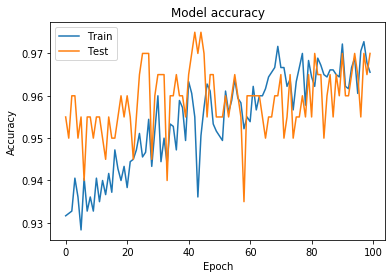

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

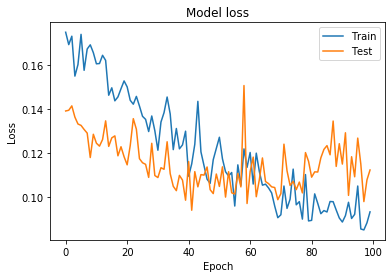

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'])
plt.show()